In [2]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten,
                                     Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
NUM_CLASSES = 10
RESHAPED = 784
HIDDEN_NEURONS = 256
IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [4]:
fashion_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(10000, IMG_ROWS, IMG_COLS, 1)

train_images, test_images = train_images/255.0, test_images/255.0



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


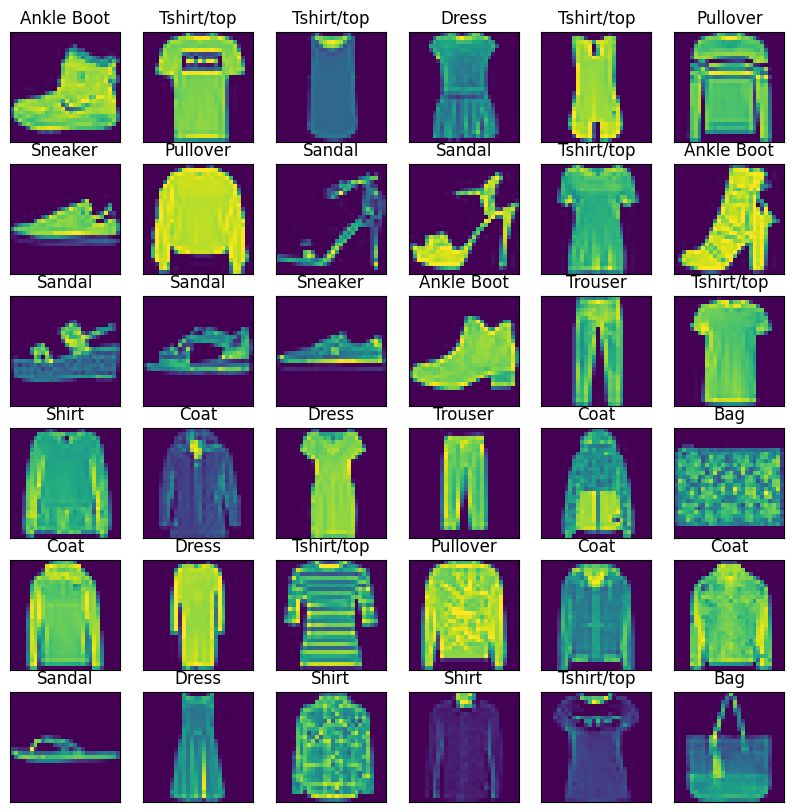

In [5]:
labels = {0 : 'Tshirt/top', 1 : 'Trouser', 2: 'Pullover', 3 : 'Dress', 4 : 'Coat', 5: 'Sandal',
          6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

plt.figure(figsize = (10,10))
for i in range (36):
  plt.subplot(6,6,i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
  label_index = train_labels[i]
  plt.title(labels[label_index])

plt.show()

In [6]:
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [10]:
class cnn_fmnist:
  @staticmethod
  def build (input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):
    l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None
    if l2 is not None: print('Using L2 regularization %.6f' % l2_loss_lambda)
    model = Sequential([

        Conv2D(32, kernel_size=(3, 3), input_shape = input_shape,
              kernel_regularizer=l2, padding='same', activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        Conv2D(64, kernel_size=(3, 3), input_shape = input_shape,
              padding='same', activation = 'relu', kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, kernel_size=(3, 3), input_shape = input_shape,
              padding='same', activation = 'relu', kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        Flatten(),
        Dropout(0.4),

        Dense(1024, activation = 'relu', kernel_regularizer=l2),
        Dropout(0.4),

        Dense(512, activation = 'relu', kernel_regularizer=l2),
        Dropout(0.2),

        Dense(NUM_CLASSES, activation = 'softmax')
    ])
    return model

In [11]:
model = cnn_fmnist.build(input_shape = INPUT_SHAPE, classes = NUM_CLASSES)

adam = Adam(learning_rate=0.001)

model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2

In [13]:
history = model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT, verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6621 - loss: 1.0677 - val_accuracy: 0.3884 - val_loss: 2.5844
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8354 - loss: 0.4501 - val_accuracy: 0.8682 - val_loss: 0.3477
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8630 - loss: 0.3738 - val_accuracy: 0.8929 - val_loss: 0.2860
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8767 - loss: 0.3360 - val_accuracy: 0.9035 - val_loss: 0.2702
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8826 - loss: 0.3173 - val_accuracy: 0.9043 - val_loss: 0.2655
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8931 - loss: 0.2943 - val_accuracy: 0.9078 - val_loss: 0.2451
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8980 - loss: 0.2756 - val_accuracy: 0.9083 - val_loss: 0.2443
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8998 - loss: 0.2720 - val_accuracy: 

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy = ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9264 - loss: 0.2226
Test accuracy =  0.9269000291824341


Text(0.5, 1.0, 'Training - Accuracy')

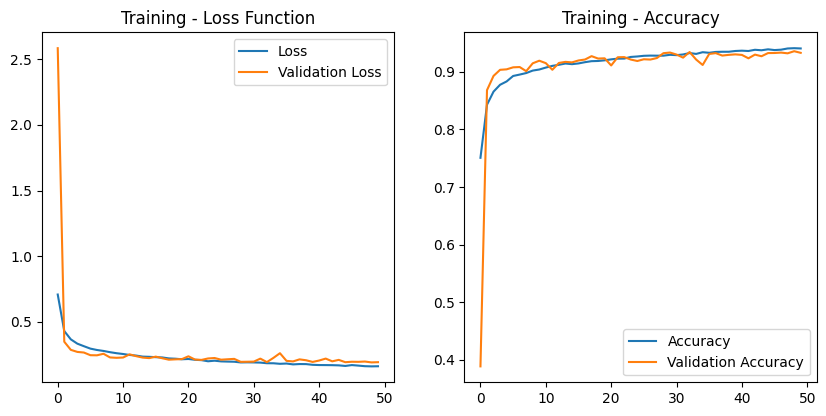

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy')

In [16]:
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis=1)

test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


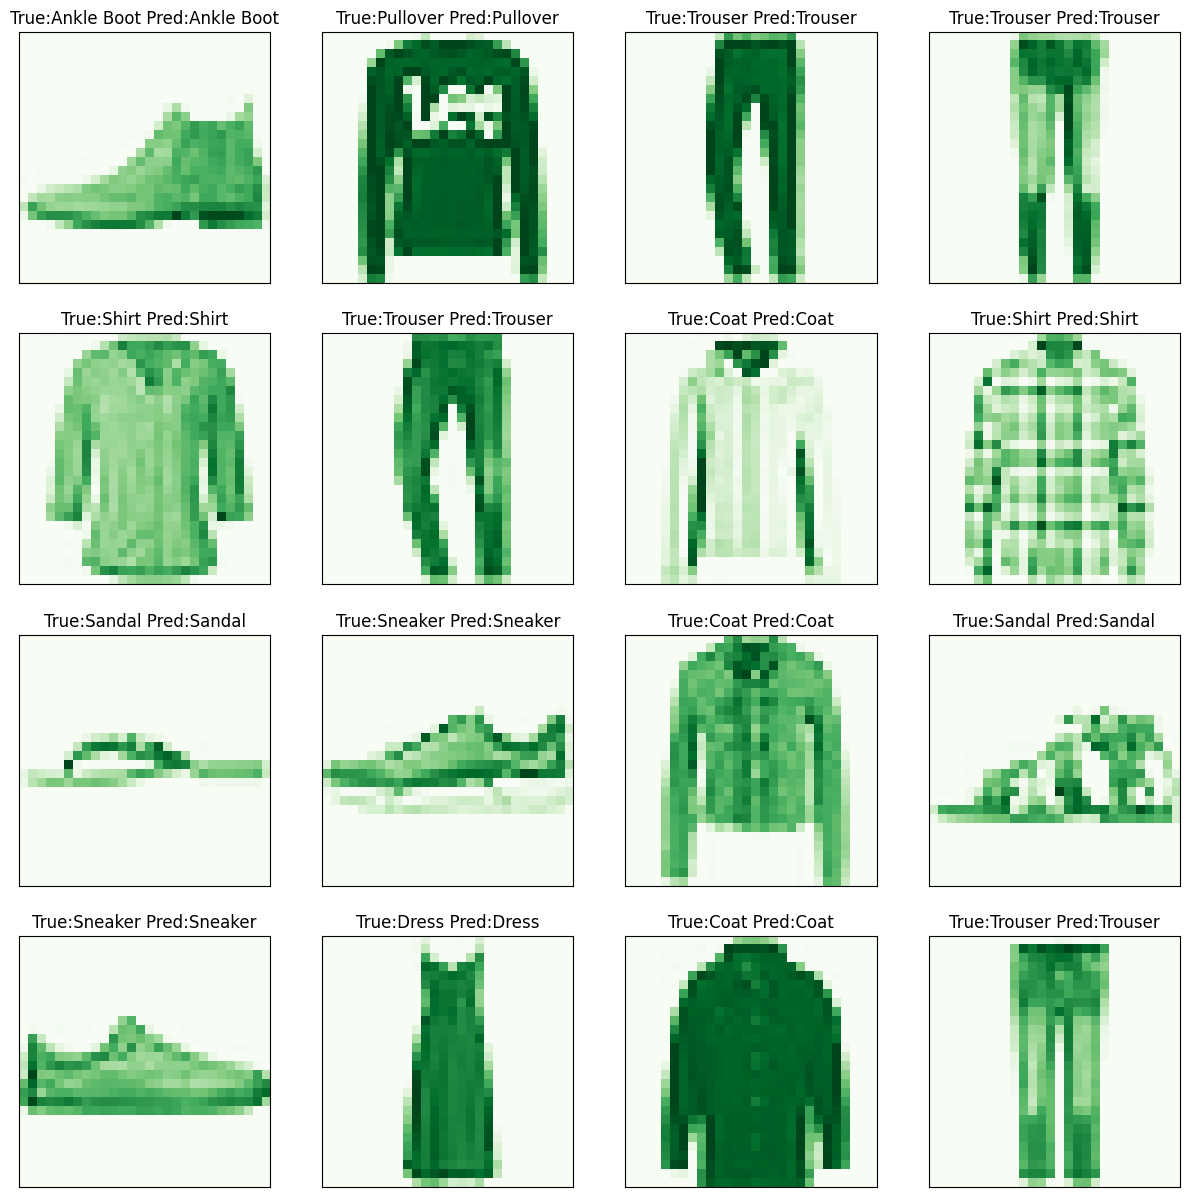

In [17]:
plt.figure(figsize = (15,15))
for i, indx in enumerate(correct[:16]):
  plt.subplot(4,4,i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = "Greens")
  label_index = train_labels[indx]
  plt.title("True:{} Pred:{}".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))

plt.show()

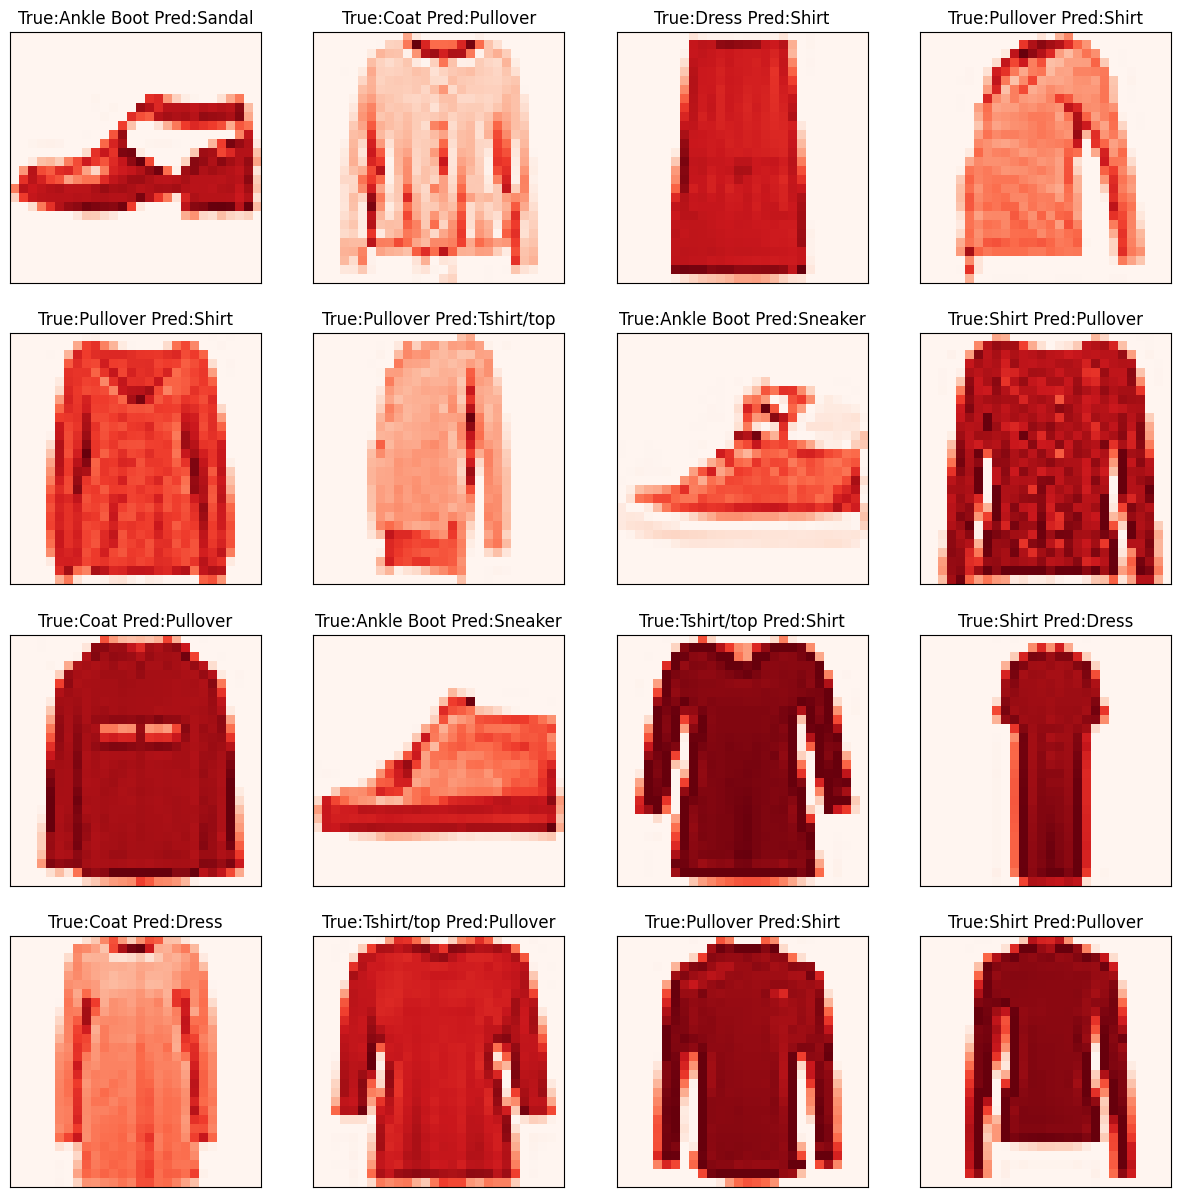

In [18]:
plt.figure(figsize = (15,15))
for i, indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = "Reds")
  label_index = train_labels[indx]
  plt.title("True:{} Pred:{}".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))

plt.show()